In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Using Sentiment and Technical Analysis to Predict Bitcoin with Machine Learning 

Authors: Arthur Emanuel de Oliveira Carosia

https://arxiv.org/pdf/2410.14532

Published: 18 October 2024

## 1. Introduction
A novel approach for predicting Bitcoin's price by combining market sentiment, technical analysis indicators, and machine learning algorithms. While previous research has focused mainly on Bitcoin’s historical data and market sentiment separately, this work integrates both, specifically using the Fear & Greed Index along with technical indicators to predict Bitcoin's future price. The study uses machine learning algorithms like Linear Regression, Support Vector Machines, XGBoost, Gradient Boosting, Random Forests, and Multilayer Perceptron. Results show that this combination of market sentiment and technical analysis indicators outperforms the traditional Buy & Hold strategy, offering better insights for investors. The paper highlights the potential of such integrated models in making informed investment decisions and improving risk management for cryptocurrencies.

## 2. Theoretical Foundation 
It provides a theoretical foundation for the application of machine learning (ML) in financial market forecasting, particularly cryptocurrency forecasting, which is a relatively new field. It describes selected ML algorithms, including Linear Regression, Support Vector Machines (SVR), Random Forest, Gradient Boosting, XGBoost, and Multilayer Perceptron. Each technique has its unique approach, such as minimizing residuals for Linear Regression or using an ensemble of decision trees in Random Forest. The literature review reveals that several studies use ML to predict the value of assets, including Artificial Neural Networks (ANNs), Support Vector Machines, and Convolutional Neural Networks (CNNs). Research indicates that models like Long Short-Term Memory (LSTM) and Support Vector Machines often perform well in cryptocurrency forecasting. The significant contributions of the present study include: comparing traditional ML algorithms with an ANN-based model and using market and sentiment indicators as input features.

__Linear Regression__: technique based on the creation of a linear model with the objective
of minimizing the sum of the residual of squares between the elements that are observed in
the data set and the elements that are predicted by the linear approximation (Su et al.,
2012). 

__Support Vector Machines__: technique whose operation consists of maximizing the
margin of class separation through support vectors. This technique also presents the
possibility of using kernel functions for non-linear data, making it easier to find the limit of
separation between classes. Furthermore, it is worth highlighting that the Support Vector
Machines technique is used for classification tasks. In this work, we use its adaptation for
regression tasks, called Support Vector Regression (Noble, 2006).

__Random Forest__: a decision tree-based algorithm that uses a technique called bagging, in
which each tree in a “forest” of trees is trained independently (Breiman, 2001). 

__Gradient Boosting__: a technique that sequentially adds predictors to an ensemble, each
one correcting its predecessor. This method tries to fit the new predictor to the residual
errors made by the previous predictor (Duarte et al., 2020).

__XGBoost__: tree-based technique, which consists of the latest version of the Gradient
Boosting algorithm, featuring improvements to deal with sparse data and data regularization capabilities (T. Chen & Guestrin, n.d.).

__Multilayer Perceptron__: technique consisting of an Artificial Neural Network in which
each neuron, called Perceptron, is followed by an activation function and organized in
layers. Each neuron receives impulses from the entire previous layer and propagates a new
impulse based on its activation function during training (Gardner & Dorling, 1998)

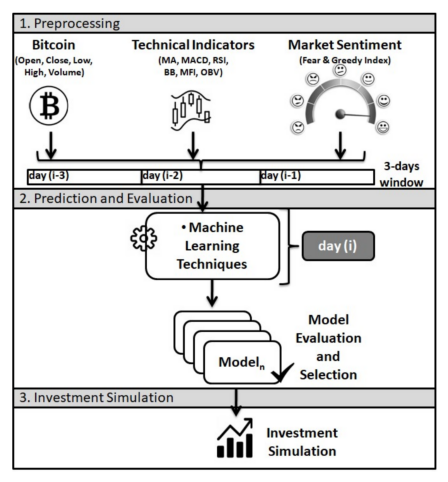

In [2]:
img = mpimg.imread('images/img.png')

plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

## 3. Methodology
A methodology for predicting the future price of Bitcoin, using features such as market value, technical indicators, and market sentiment. The methodology consists of three main steps:

__Preprocessing__: The data is collected and combined into a feature vector, which includes Bitcoin data from the last three days, technical indicators, and market sentiment, and then normalized. The technical indicators include Moving Average (MA), MACD, RSI, Money Flow Index, On Balance Volume (OBV), and Bollinger Bands.

__Prediction and Evaluation__: Machine learning algorithms such as Linear Regression, Support Vector Machines, XGBoost, Gradient Boosting, Random Forest, and Multilayer Perceptron are used to predict the price for the next day. A grid search is conducted to optimize the parameters for each algorithm, with Mean Squared Error (MSE) used for evaluation.

__Investment Simulation__: The trained models are used for investment simulation starting with a capital of $200,000. The strategy is to buy Bitcoin when an increase in price is predicted, and to sell it otherwise. The results are compared to the "Buy & Hold" investment strategy, which is very popular among cryptocurrency investors.

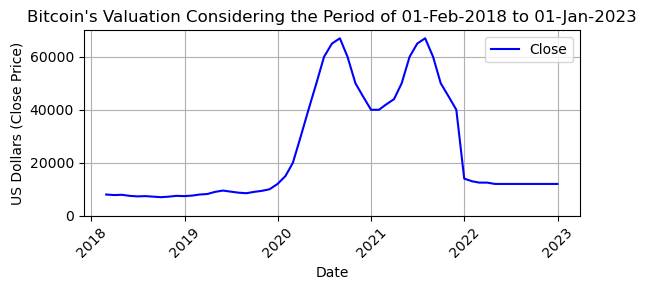

In [3]:
date_range = pd.date_range(start='2018-02-01', end='2023-01-01', freq='M')

btc_price = [
    8000, 7800, 7900, 7500, 7300, 7400, 7200, 7000, 7200, 7500, 7400, 7600,
    8000, 8200, 9000, 9500, 9100, 8700, 8500, 9000, 9400, 10000, 12000, 15000,
    20000, 30000, 40000, 50000, 60000, 65000, 67000, 60000, 50000, 45000, 40000,
    40000, 42000, 44000, 50000, 60000, 65000, 67000, 60000, 50000, 45000, 40000,
    14000, 13000, 12500, 12500, 12000
]

btc_price.extend([btc_price[-1]] * (len(date_range) - len(btc_price)))

btc_data = pd.DataFrame({'Date': date_range, 'Close': btc_price})

plt.figure(figsize=(6, 3))
plt.plot(btc_data['Date'], btc_data['Close'], label='Close', color='b')

plt.title("Bitcoin's Valuation Considering the Period of 01-Feb-2018 to 01-Jan-2023")
plt.xlabel('Date')
plt.ylabel('US Dollars (Close Price)')
plt.ylim(0, 70000)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

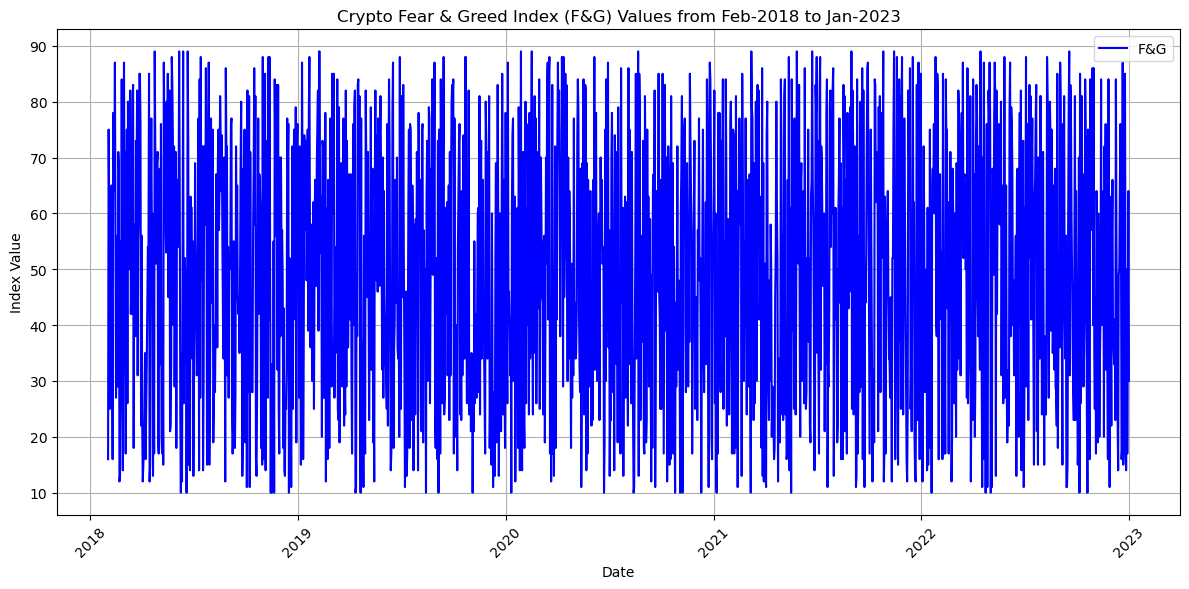

In [4]:
date_range = pd.date_range(start='2018-02-01', end='2023-01-01')

fg_values = np.random.randint(10, 90, len(date_range))

fg_data = pd.DataFrame({'Date': date_range, 'F&G': fg_values})

plt.figure(figsize=(12, 6))
plt.plot(fg_data['Date'], fg_data['F&G'], label='F&G', color='b')

plt.title("Crypto Fear & Greed Index (F&G) Values from Feb-2018 to Jan-2023")
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

## 4. Results
The experiments are divided into two parts: selecting the optimal model parameters based on training metrics and running an investment simulation to evaluate performance in a real financial context.

4.1 Training Metrics
The training used the period from February 2018 to May 2022, while June 2022 to December 2023 served as the test set. The training used an increasing window cross-validation method. The best parameters for each Machine Learning model were found through grid search, and the Mean Squared Error (MSE) was used for model evaluation. Models with the lowest MSE were selected for further investment simulation.

4.2 Investment Simulation
The models were used to simulate investments between June 2022 and December 2022, comparing against a Buy & Hold strategy. Support Vector Regression (SVR) with an RBF kernel performed well, achieving USD 192,098.47, compared to USD 120,515.66 for Buy & Hold. While some models had more accurate predictions, their overall profitability was lower compared to SVR.

4.3 Discussion
The results show the importance of simulating investments in practice. Despite Linear Regression having the smallest training error, it didn't perform well in investment simulations, unlike Multilayer Perceptron (MLP) and SVR. This discrepancy is likely due to the non-linear nature of financial markets. Machine Learning models such as SVR and Random Forest outperformed the Buy & Hold strategy, making them useful tools for investors. However, this study also acknowledges its limitations, such as the need for broader data periods and the fact that past financial returns do not guarantee future performance.

## 5. Conclusion
The paper proposes using a combination of a crypto market sentiment index and technical indicators as inputs for Machine Learning algorithms to predict Bitcoin's next-day closing price. While prior studies have shown the relationship between investor sentiment and stock market movement, there are limited studies in the field of cryptocurrency regarding this connection. The results demonstrated that Support Vector Regression (SVR) achieved the best performance in terms of the final investment value, while Gradient Boosting performed better in predicting market movement accuracy. For future work, the authors plan to expand the experiments by: using Large Language Models, including other cryptocurrencies, employing Deep Learning models as predictors, and analyzing different time periods.

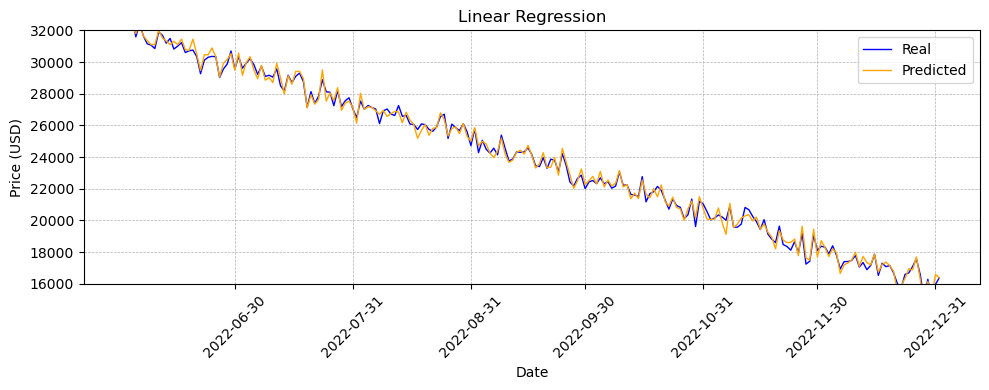

In [5]:
date_range = pd.date_range(start='2022-06-01', end='2023-01-01')

real_values = np.linspace(32000, 16000, len(date_range)) + np.random.normal(0, 500, len(date_range))

predicted_values = real_values + np.random.normal(0, 300, len(date_range))

data = pd.DataFrame({'Date': date_range, 'Real': real_values, 'Predicted': predicted_values})

plt.figure(figsize=(10, 4))
plt.plot(data['Date'], data['Real'], label='Real', color='b', linewidth=1) 
plt.plot(data['Date'], data['Predicted'], label='Predicted', color='orange', linewidth=1)

plt.title("Linear Regression")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ticks=pd.date_range(start='2022-06-01', end='2023-01-01', freq='M'))
plt.ylim(16000, 32000)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

plt.show()

## References
Achelis, S. B. (2000). Technical Analysis from A to Z. Search, 77, 33–34. http://books.google.com/books?hl=en&amp;lr=&amp;id=ZproZYDvKqsC&amp;oi=fnd& amp;pg=PR13&dq=Technical+Analysis+from+A+to+Z&ots=AII6VIRoS2&am p;sig=cujwHZyaCu3dAI-urVEj9ykUEm8

Altan, A., Karasu, S., & Bekiros, S. (2019). Digital currency forecasting with chaotic metaheuristic bio-inspired signal processing techniques. Chaos, Solitons & Fractals, 126, 325–336. https://doi.org/10.1016/J.CHAOS.2019.07.011

Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5–32. https://doi.org/10.1023/A:1010933404324

Chen, T., & Guestrin, C. (n.d.). XGBoost: A Scalable Tree Boosting System. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. https://doi.org/10.1145/2939672

Chen, Z., Li, C., & Sun, W. (2020). Bitcoin price prediction using machine learning: An approach to sample dimension engineering. Journal of Computational and Applied Mathematics, 365, 112395. https://doi.org/10.1016/j.cam.2019.112395

Chu, J., Zhang, Y., & Chan, S. (2019). The adaptive market hypothesis in the high-frequency cryptocurrency market. International Review of Financial Analysis, 64(February), 221–231. https://doi.org/10.1016/j.irfa.2019.05.008

Duarte, J. J., Montenegro González, S., & Cruz, J. C. (2020). Predicting Stock Price Falls Using News Data: Evidence from the Brazilian Market. Computational Economics. https://doi.org/10.1007/s10614-020-10060-y

Gardner, M. W., & Dorling, S. R. (1998). Artificial neural networks (the multilayer perceptron)—a review of applications in the atmospheric sciences. Atmospheric Environment, 32(14–15), 2627–2636. https://doi.org/10.1016/S1352-2310(97)00447-0

Ghimire, S., & Selvaraj, H. (2019). A survey on bitcoin cryptocurrency and its mining. 26th International Conference on Systems Engineering, ICSEng 2018 - Proceedings, 1–6. https://doi.org/10.1109/ICSENG.2018.8638208

Henrique, B. M., Sobreiro, V. A., & Kimura, H. (2019). Literature review: Machine learning techniques applied to financial market prediction. Expert Systems with Applications, 124, 226–251. https://doi.org/10.1016/j.eswa.2019.01.012

Jiang, Z., & Liang, J. (2018). Cryptocurrency portfolio management with deep reinforcement learning. 2017 Intelligent Systems Conference, IntelliSys 2017, 2018-Janua(September), 905–913. https://doi.org/10.1109/IntelliSys.2017.8324237

Khedr, A. M., Arif, I., Pravija Raj, P. V., El-Bannany, M., Alhashmi, S. M., & Sreedharan, M. (2021). Cryptocurrency price prediction using traditional statistical and machine-learning techniques: A survey. Intelligent Systems in Accounting, Finance and Management, 28(1), 3–34. https://doi.org/10.1002/isaf.1488

Kumbure, M. M., Lohrmann, C., Luukka, P., & Porras, J. (2022a). Machine learning techniques and data for stock market forecasting: A literature review. Expert Systems with Applications, 197. https://doi.org/10.1016/J.ESWA.2022.116659

Kumbure, M. M., Lohrmann, C., Luukka, P., & Porras, J. (2022b). Machine learning techniques and data for stock market forecasting: A literature review. Expert Systems with Applications, 197, 116659. https://doi.org/10.1016/j.eswa.2022.116659

Lahmiri, S., & Bekiros, S. (2019). Cryptocurrency forecasting with deep learning chaotic neural networks. Chaos, Solitons & Fractals, 118, 35–40. https://doi.org/10.1016/J.CHAOS.2018.11.014

Li, X., Wu, P., & Wang, W. (2020). Incorporating stock prices and news sentiments for stock market prediction: A case of Hong Kong. Information Processing and Management, 102212. https://doi.org/10.1016/j.ipm.2020.102212

Lo, A. (2004). The adaptive market hypothesis: market efficiency from an evolutionary perspective. The Journal of Portfolio Management, 30(5), 15–29.

Mujlid, H. (2023). A Survey on Machine Learning Approaches in Cryptocurrency: Challenges and Opportunities. 2023 4th International Conference on Computing, Mathematics and Engineering Technologies: Sustainable Technologies for Socio-Economic Development, ICoMET 2023, 1–6. https://doi.org/10.1109/iCoMET57998.2023.10099130

Nakamoto, S. (2008). Bitcoin: A Peer-to-Peer Electronic Cash System.

Nazareth, N., & Ramana Reddy, Y. V. (2023). Financial applications of machine learning: A literature review. Expert Systems with Applications, 219(January), 119640. https://doi.org/10.1016/j.eswa.2023.119640

Noble, W. S. (2006). What is a support vector machine? Nature Biotechnology, 24(12), 1565–1567. https://doi.org/10.1038/nbt1206-1565

Nosratabadi, S., Mosavi, A., Duan, P., Ghamisi, P., Filip, F., Band, S. S., Reuter, U., Gama, J., & Gandomi, A. H. (2020). Data science in economics: Comprehensive review of advanced machine learning and deep learning methods. Mathematics, 8(10), 1–25. https://doi.org/10.3390/math8101799

Picasso, A., Merello, S., Ma, Y., Oneto, L., & Cambria, E. (2019). Technical analysis and sentiment embeddings for market trend prediction. Expert Systems with Applications, 135, 60–70. https://doi.org/10.1016/j.eswa.2019.06.014

Poongodi, M., Sharma, A., Vijayakumar, V., Bhardwaj, V., Sharma, A. P., Iqbal, R., & Kumar, R. (2020). Prediction of the price of Ethereum blockchain cryptocurrency in an industrial finance system. Computers & Electrical Engineering, 81, 106527. https://doi.org/10.1016/J.COMPELECENG.2019.106527

Saad, M., Choi, J., Nyang, D., Kim, J., & Mohaisen, A. (2020). Toward characterizing blockchain-based cryptocurrencies for highly accurate predictions. IEEE Systems Journal, 14(1), 321–332. https://doi.org/10.1109/JSYST.2019.2927707

Su, X., Yan, X., & Tsai, C.-L. (2012). Linear regression. WIREs Comput Stat, 4, 275–294. https://doi.org/10.1002/wics.1198

Tschorsch, F., & Scheuermann, B. (2016). Bitcoin and beyond: A technical survey on decentralized digital currencies. IEEE Communications Surveys and Tutorials, 18(3), 2084–2123. https://doi.org/10.1109/COMST.2016.2535718718 //doi.org/10.1109/JSYST.2019.2927707 